# Phase 1 Code Challenge Review 

_November 4, 2020_ 

TOPICS TO BE COVERED:
- Pandas Operations
- Data Visualization
- Statistics
- Python Data Structure

#### 1. Pandas Operations

In [95]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [96]:
# import data from a file 
df = sns.load_dataset('iris')

# what if this file is in a directory?

df2 = pd.read_csv('auto-mpg.csv')

In [97]:
# examine the first few elements of it
df.head()
# df.info
# df.columns

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [98]:
df2.head()
# df2.info
# df2.columns

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [99]:
# examine the dimensions of it
df.shape
# df2.shape

(150, 5)

In [100]:
# check to see if you have missing values
df.isnull().sum()
df2.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [101]:
# introduce some missing values
df.iloc[2:10,1:3] = np.nan
df.isnull().sum()

sepal_length    0
sepal_width     8
petal_length    8
petal_width     0
species         0
dtype: int64

In [102]:
# drop them by certain columns
#axis = 1 means dropping values by colums, axis = 0 means dropping by rows
df.dropna(subset = ['sepal_width'], axis = 0, inplace = True)

In [104]:
# convert and modify columns

# create a new column, that is 10 times the sepal length, called sepal length 10
df['sepal_length_10'] = df['sepal_length']*10
df.head()n

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_10
0,5.1,3.5,1.4,0.2,setosa,51.0
1,4.9,3.0,1.4,0.2,setosa,49.0
10,5.4,3.7,1.5,0.2,setosa,54.0
11,4.8,3.4,1.6,0.2,setosa,48.0
12,4.8,3.0,1.4,0.1,setosa,48.0


In [105]:
# another way?
df['sepal_length_10_lambda'] = df['sepal_length'].apply(lambda x: x*10)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_10,sepal_length_10_lambda
0,5.1,3.5,1.4,0.2,setosa,51.0,51.0
1,4.9,3.0,1.4,0.2,setosa,49.0,49.0
10,5.4,3.7,1.5,0.2,setosa,54.0,54.0
11,4.8,3.4,1.6,0.2,setosa,48.0,48.0
12,4.8,3.0,1.4,0.1,setosa,48.0,48.0


#### 2. Data Visualization

In [106]:
# how many species are there, and how many flowers are in each species
df['species'].nunique()
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [107]:
df.groupby(['species']).count()
df.groupby(['species']).size()

species
setosa        42
versicolor    50
virginica     50
dtype: int64

In [108]:
petal_length_by_sp = df.groupby(['species']).petal_length.mean()
petal_length_by_sp

species
setosa        1.461905
versicolor    4.260000
virginica     5.552000
Name: petal_length, dtype: float64

In [109]:
# let's plot the average pedal length for each species of iris 


Text(0.5, 0, 'species')

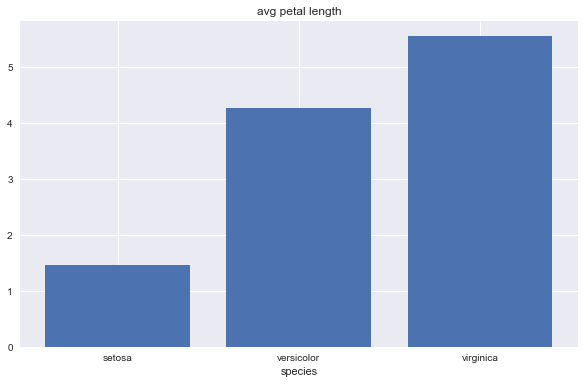

In [110]:
x = petal_length_by_sp.index
y = petal_length_by_sp

figure, ax = plt.subplots(figsize = (10,6))

ax.bar(x, y)

ax.set_title('avg petal length')
ax.set_xlabel('species')
#ax.set_xticks([1,2,3])
#ax.set_xticklabels(['flower1','flower2','flower3'])

<BarContainer object of 4 artists>

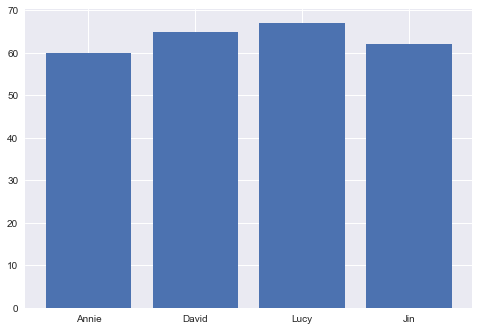

In [111]:
# your turn - create a bar chart using the following dummy data
persons = ['Annie', 'David', 'Lucy','Jin']
height = [60, 65, 67, 62]

plt.bar(persons, height)



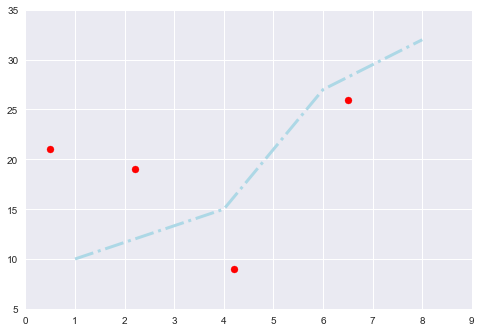

In [165]:
# scatterplot 
# Define a new figure with matplotlib's .figure() function. 
new_figure = plt.figure()

# Add a subplot to the figure - a new axes
ax = new_figure.add_subplot(111)

# Generate a line plot 
ax.plot([1, 4, 6, 8], [10, 15, 27, 32], color='lightblue', linewidth=3, linestyle = '-.')

# Draw a scatter plot on same axes
ax.scatter([0.5, 2.2, 4.2, 6.5], [21, 19, 9, 26], color='red', marker='o')

# Set the limits of x and y for axes
ax.set_xlim(0, 9), ax.set_ylim(5,35)

# Show the plot
plt.show()

In [113]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,sepal_length_10,sepal_length_10_lambda
sepal_length,1.000000,-0.092449,0.861474,0.802464,1.000000,1.000000
sepal_width,-0.092449,1.000000,-0.414134,-0.349062,-0.092449,-0.092449
petal_length,0.861474,-0.414134,1.000000,0.959259,0.861474,0.861474
petal_width,0.802464,-0.349062,0.959259,1.000000,0.802464,0.802464
sepal_length_10,1.000000,-0.092449,0.861474,0.802464,1.000000,1.000000
sepal_length_10_lambda,1.000000,-0.092449,0.861474,0.802464,1.000000,1.000000


Can you describe the relationship above?

#### 3. Statistics 

In [114]:
# calculate the mean and median value for sepal length 
df['sepal_length'].mean()
df['sepal_length'].median()

5.8

In [115]:
df.sepal_length.agg(['mean','median'])

mean      5.900704
median    5.800000
Name: sepal_length, dtype: float64

In [116]:
# what can you say about the distribution of sepal length and sepal width based on this distribution? 



In [117]:
# which flower has the longest pedal? what is the species of that flower
df.groupby(['species']).petal_length.max()


species
setosa        1.9
versicolor    5.1
virginica     6.9
Name: petal_length, dtype: float64

In [118]:
df.sort_values(by = 'petal_length', ascending = False).head(1)

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_10,sepal_length_10_lambda
118,7.7,2.6,6.9,2.3,virginica,77.0,77.0


In [119]:
#use logical subset
df[df.petal_length == df.petal_length.max()]

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_10,sepal_length_10_lambda
118,7.7,2.6,6.9,2.3,virginica,77.0,77.0


#### 4. Python Data Structure 

In [120]:
get_money = {'get':
            [{'get':[{
                'get':'money'
            }]}]}

In [121]:
# get the money 
get_money['get'][0]['get'][0]['get']

'money'

In [122]:
groomer_info = { 'pets':
    [{'Ginger': [{
        'age': 5,
        'type': 'Pitbull',
        'attribute': ['Playful','Cheery','Hyper']
    }],
    'Chloe': [{
        'age': 1,
        'type': 'Maine Coon Cat',
        'attribute': ['Alert','Independent','Playful']
    }],
    'Joe Rogan': [{
        'age': 8,
        'type': 'Parrot',
        'attribute': ['Loud','Opinionated','Annoying']
    }],
    'Rick Astley': [{
        'age': 2,
        'type': 'Labrador',
        'attributes': ['never','gives','you','up']
    }]}]
}    

In [123]:
# explore the structure of dictionary
groomer_info.keys()
groomer_info.values()
groomer_info['pets'][0]['Ginger'][0]['attribute'][-1]
# type(groomer_info['pets'])

'Hyper'

In [124]:
names = list(groomer_info['pets'][0].keys())
names

['Ginger', 'Chloe', 'Joe Rogan', 'Rick Astley']

In [125]:
groomer_info['pets'][0]['Ginger'][0]['type']

'Pitbull'

In [126]:
ages = []
for name in names:
    ages.append(groomer_info['pets'][0][name][0]['age'])
ages    

[5, 1, 8, 2]

In [127]:
types = []
for name in names:
    types.append(groomer_info['pets'][0][name][0]['type'])
    
types

['Pitbull', 'Maine Coon Cat', 'Parrot', 'Labrador']

In [128]:
# create a list of names containing all pets' names
pet_names = []
for pet in groomer_info['pets']:
    for name in pet:
        pet_names.append(name)
   
pet_names

['Ginger', 'Chloe', 'Joe Rogan', 'Rick Astley']

In [129]:
#  create a list that contain all pets' types
# desired output ['Pitbull','Maine Coon','Parrot','Labrador']
pet_types = []
for pet in groomer_info['pets']:
    for name in pet:
        for x in pet[name]:
            xtype = x['type']
            pet_types.append(xtype)
        
pet_types

['Pitbull', 'Maine Coon Cat', 'Parrot', 'Labrador']

In [130]:
# create a list that contain all pets age 
groomer_info['pets'][0].keys()

dict_keys(['Ginger', 'Chloe', 'Joe Rogan', 'Rick Astley'])

In [131]:
names2 = [name for name in groomer_info['pets'][0]]
names2

['Ginger', 'Chloe', 'Joe Rogan', 'Rick Astley']

In [132]:

# for x in groomer_info['pets']:
#     for y in x:
#         for z in x[y][0]:
#             print(x[y][0]['age'])

# for name in names:

pet_ages2 = [groomer_info['pets'][0][name][0]['age'] for name in names]
pet_ages2

[5, 1, 8, 2]

In [133]:
groomer_info['pets'][0]['Ginger'][0]['age']

5

In [134]:
# create a function that returns the names of pets who is older than x years old

# the function should take in a dictionary containing all pet information, 
# and an integer indicating age you want to compare

# if age > groomer_info['pets'][0][name][0]['age']:
#     return groomer_info['pets'][0][name]
# ages = []
# for name in names:
#     ages.append(groomer_info['pets'][0][name][0]['age'])
    
# def pets_older_than(groomer_info, age):
#     if age > groomer_info['pets'][0][name][0]['age']:
#         return groomer_info['pets'][0][name][0]['age']
#     for x in ages:
#         if x > age:
#             older = 
#             print (pet_names)

# pets_older_than(groomer_info,2)

In [135]:
names2 = [name for name in groomer_info['pets'][0]]
names2

['Ginger', 'Chloe', 'Joe Rogan', 'Rick Astley']

In [136]:
pet_ages2 = [groomer_info['pets'][0][name][0]['age'] for name in names2]
pet_ages2

[5, 1, 8, 2]

In [137]:
pet_ages2.index(5)


0

In [138]:
g = groomer_info['pets'][0]
g['Ginger'][0]['age']

5

In [158]:
lst = []
def pets_older_than(groomer_info, age):
    
    for key in groomer_info.keys():
        if groomer_info[key][0]['age'] > age:
            lst.append(key)

In [159]:
lst

[]

In [160]:
# def pets_older_than(groomer_info, age):
#     older_than = []
#     for x in pet_ages2:
#         if x > age :
#             return pet_ages2.index(x)
            
# #             return names2[y]

In [163]:
pets_older_than(g,1)
>>> ['Ginger','Joe Rogan']

['Ginger', 'Joe Rogan']

In [164]:
lst

['Ginger', 'Joe Rogan', 'Ginger', 'Joe Rogan', 'Rick Astley']

syntax of list comprehension: [expression for item in collection if xxx else xxx]
for example:
[i*2 for i in list]